In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download()
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

##Pie Chart for target variable

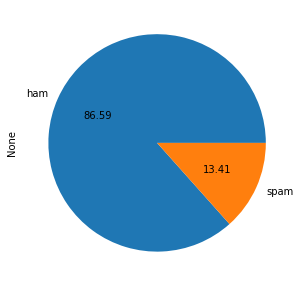

In [ ]:
data.groupby('v1').size().plot(kind='pie', autopct='%.2f',figsize=(5,5))


##Data Preprocessing

In [ ]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
final_corpus = []
stemmer = LancasterStemmer()

for i in range(len(data)):
  word = word_tokenize(data['v2'][i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=data['v1']

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Testing multiple Models

In [ ]:
models=[]
models.append(('svm',SVC(gamma='auto')))
models.append(('lr',LogisticRegression()))
models.append(('XGB',XGBClassifier()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))

In [ ]:
from sklearn.metrics import classification_report
for name,model in models:
  print('--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--')
  print(name)
  model.fit(X_train,y_train)
  predict=model.predict(X_test)
  print(classification_report(predict,y_test))
  print('--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--')


--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--
svm
              precision    recall  f1-score   support

         ham       1.00      0.86      0.93      1839
        spam       0.00      0.00      0.00         0

    accuracy                           0.86      1839
   macro avg       0.50      0.43      0.46      1839
weighted avg       1.00      0.86      0.93      1839

--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--
--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--
lr
              precision    recall  f1-score   support

         ham       0.99      0.94      0.97      1676
        spam       0.62      0.95      0.75       163

    accuracy                           0.94      1839
   macro avg       0.81      0.95      0.86      1839
weighted avg       0.96      0.94      0.95      1839

--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X

#Word Cloud

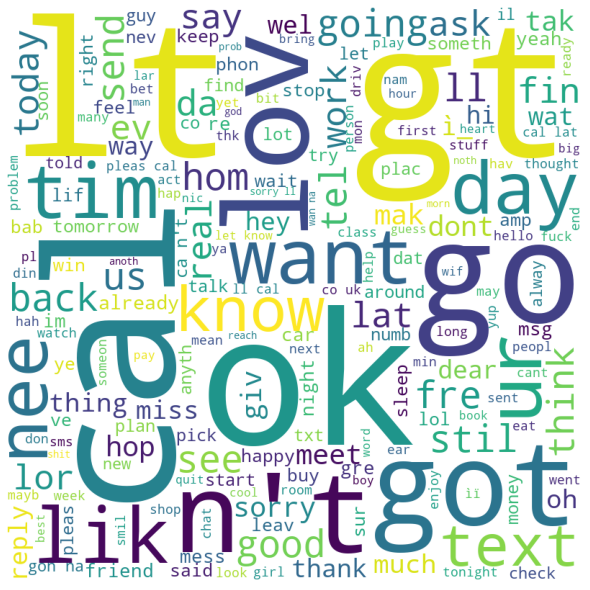

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

comment_words = ""

for val in final_corpus:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):

    tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
